In [1]:
import pandas as pd

columns = [
    "timestamp",
    "case_uuid",
    "run_name",
    "x0",
    "x1",
    "x2",
    "x3",
    "x4",
    "x5",
    "no_clipping",
    "block_mesh",
    "check_mesh",
    "simple",
    "convergence",
    "vx",
    "vy",
    "vz",
    "cl",
    "cd",
]

df_results = pd.read_csv("results/csv/results.csv", header=None, names=columns)
print("Brute-force results preview:")
print(df_results.head())

columns = [
    "timestamp",
    "case_uuid",
    "run_name",
    "x0",
    "x1",
    "x2",
    "x3",
    "x4",
    "x5",
    "no_clipping",
    "block_mesh",
    "check_mesh",
    "simple",
    "convergence",
    "vx",
    "vy",
    "vz",
    "cl_cd",
]

df_custom = pd.read_csv("results/csv/custom_results.csv", header=None, names=columns)
print("\nSurrogate (custom) results preview:")
print(df_custom.head())

Brute-force results preview:
                    timestamp                             case_uuid  \
0  2025-03-03T21:05:45.350634  f19c5e98-1867-4dbc-a7fc-7d7a7a11a641   
1  2025-03-03T21:05:45.351655  e3b88604-ee00-40f0-a501-db0355b9e37a   
2  2025-03-03T21:05:45.351895  1d551070-9da3-4fbe-b2dd-d73eb69735c9   
3  2025-03-03T21:05:45.352251  8b991971-948e-4212-b625-e93efe1400b2   
4  2025-03-03T21:05:45.353316  1eaf80b0-4ece-41f4-9242-42b74c2e5fb2   

                                            run_name        x0        x1  \
0  5_degree_AoA_fixed_nu_tilda_reduced_yplus_pena... -0.757310  0.604919   
1  5_degree_AoA_fixed_nu_tilda_reduced_yplus_pena... -0.668189 -1.024275   
2  5_degree_AoA_fixed_nu_tilda_reduced_yplus_pena... -1.423447  0.976704   
3  5_degree_AoA_fixed_nu_tilda_reduced_yplus_pena... -1.314119  0.812812   
4  5_degree_AoA_fixed_nu_tilda_reduced_yplus_pena... -0.718747  0.048086   

         x2        x3        x4        x5  no_clipping  block_mesh  \
0  0.117403  0.34

In [2]:
# Cell 2: Process Brute-Force Results
# Filter converged simulations (assuming 'convergence' is 1 for converged runs)
df_conv = df_results[df_results["convergence"] == 1]

# Compute lift-to-drag ratio using 'cl' and 'cd'
df_conv["l_to_d"] = df_conv["cl"] / df_conv["cd"]

# Calculate key statistics
best_ld = df_conv["l_to_d"].max()
mean_ld = df_conv["l_to_d"].mean()
std_ld = df_conv["l_to_d"].std()

print("Brute-Force Optimization Results:")
print("Number of converged simulations:", len(df_conv))
print("Best L/D Ratio:", best_ld)
print("Mean L/D Ratio:", mean_ld)
print("Standard Deviation of L/D Ratio:", std_ld)

Brute-Force Optimization Results:
Number of converged simulations: 441
Best L/D Ratio: 55.62202334778013
Mean L/D Ratio: 22.945910807939576
Standard Deviation of L/D Ratio: 14.896072047695348


/tmp/ipykernel_56685/3368068736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conv["l_to_d"] = df_conv["cl"] / df_conv["cd"]


In [3]:
# Cell 3: Process Surrogate (Custom) Results
# The 'cl_cd' column is assumed to represent the Reynolds number predictions.
peak_reynolds = df_custom["cl_cd"].max()
mean_reynolds = df_custom["cl_cd"].mean()
num_predictions = len(df_custom)

print("\nSurrogate-Assisted Optimization Results:")
print("Number of predictions:", num_predictions)
print("Number of converged:", len(df_custom[df_custom["convergence"] == 1]))
print("Peak Reynolds Number:", peak_reynolds)
print("Mean Reynolds Number:", mean_reynolds)
print(
    "Values of CST coefficients for the best Reynolds number:",
    df_custom[df_custom["cl_cd"] == peak_reynolds][
        ["x0", "x1", "x2", "x3", "x4", "x5"]
    ].values[0],
)


Surrogate-Assisted Optimization Results:
Number of predictions: 29639
Number of converged: 29540
Peak Reynolds Number: 57.35505385924255
Mean Reynolds Number: 56.63333281268128
Values of CST coefficients for the best Reynolds number: [-0.11763894 -0.04846345  0.18096387  0.38838721  0.20867976  0.30349777]


In [ ]:
# Cell 5: Additional Brute-Force Statistics
import numpy as np

# Calculate additional metrics for brute-force results (converged cases)
min_ld = df_conv["l_to_d"].min()
median_ld = df_conv["l_to_d"].median()
q1_ld = df_conv["l_to_d"].quantile(0.25)
q3_ld = df_conv["l_to_d"].quantile(0.75)
iqr_ld = q3_ld - q1_ld
coef_var_ld = std_ld / mean_ld

print("Additional Brute-Force Statistics:")
print("Minimum L/D Ratio:", min_ld)
print("Median L/D Ratio:", median_ld)
print("25th Percentile (Q1):", q1_ld)
print("75th Percentile (Q3):", q3_ld)
print("Interquartile Range (IQR):", iqr_ld)
print("Coefficient of Variation (Std/Mean):", coef_var_ld)

# Compute correlation between CST coefficients and L/D Ratio
cst_columns = ["x0", "x1", "x2", "x3", "x4", "x5"]
corr_matrix = df_conv[cst_columns + ["l_to_d"]].corr()
print("\nCorrelation Matrix between CST Coefficients and L/D Ratio:")
print(corr_matrix)

Additional Brute-Force Statistics:
Minimum L/D Ratio: -19.771240056289773
Median L/D Ratio: 22.843425032086067
25th Percentile (Q1): 10.788839575607636
75th Percentile (Q3): 35.33914233113737
Interquartile Range (IQR): 24.55030275552973
Coefficient of Variation (Std/Mean): 0.6491819903065743

Correlation Matrix between CST Coefficients and L/D Ratio:
              x0        x1        x2        x3        x4        x5    l_to_d
x0      1.000000 -0.197382  0.061567  0.101631 -0.276247 -0.071124  0.363113
x1     -0.197382  1.000000 -0.130266 -0.269347  0.477749  0.104058  0.214103
x2      0.061567 -0.130266  1.000000 -0.005987  0.034101  0.186566  0.395688
x3      0.101631 -0.269347 -0.005987  1.000000  0.011701  0.046774 -0.026398
x4     -0.276247  0.477749  0.034101  0.011701  1.000000 -0.034187 -0.227618
x5     -0.071124  0.104058  0.186566  0.046774 -0.034187  1.000000 -0.056754
l_to_d  0.363113  0.214103  0.395688 -0.026398 -0.227618 -0.056754  1.000000


In [ ]:
# Cell 6: Additional Surrogate-Assisted Statistics
# Calculate additional metrics for surrogate-assisted results
min_reynolds = df_custom["cl_cd"].min()
median_reynolds = df_custom["cl_cd"].median()
q1_re = df_custom["cl_cd"].quantile(0.25)
q3_re = df_custom["cl_cd"].quantile(0.75)
iqr_re = q3_re - q1_re
std_re = df_custom["cl_cd"].std()
coef_var_re = std_re / mean_reynolds

print("Additional Surrogate-Assisted Statistics:")
print("Minimum Reynolds Number:", min_reynolds)
print("Median Reynolds Number:", median_reynolds)
print("25th Percentile (Q1):", q1_re)
print("75th Percentile (Q3):", q3_re)
print("Interquartile Range (IQR):", iqr_re)
print("Coefficient of Variation (Std/Mean):", coef_var_re)

Additional Surrogate-Assisted Statistics:
Minimum Reynolds Number: 0.1089246154233887
Median Reynolds Number: 57.354909292109596
25th Percentile (Q1): 57.35161237784983
75th Percentile (Q3): 57.355035199288054
Interquartile Range (IQR): 0.0034228214382210354
Coefficient of Variation (Std/Mean): 0.06875593427748065


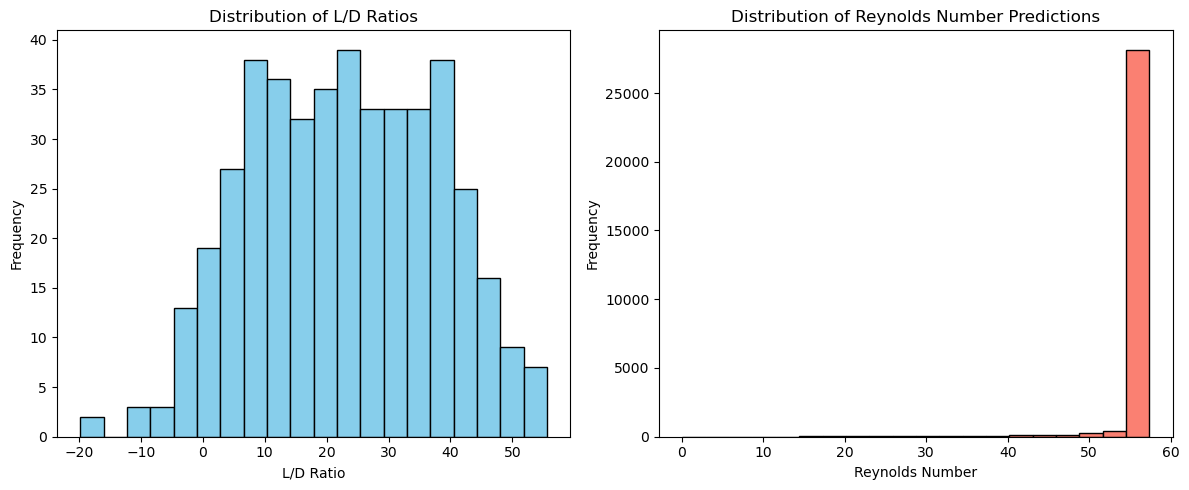

In [6]:
# Cell 4: Plotting Distributions for Further Insights
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Distribution of L/D Ratios from Brute-Force Phase
plt.subplot(1, 2, 1)
plt.hist(df_conv["l_to_d"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of L/D Ratios")
plt.xlabel("L/D Ratio")
plt.ylabel("Frequency")

# Distribution of Reynolds Number Predictions from Surrogate Phase
plt.subplot(1, 2, 2)
plt.hist(df_custom["cl_cd"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution of Reynolds Number Predictions")
plt.xlabel("Reynolds Number")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()